In [1]:
# Importing Required Packages
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import random
import names
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [4]:
# Creating Lists for Dataframe
height = sorted([random.randint(100, 210) for i in range(10)])
weight = sorted([random.randint(35, 100) for i in range(10)])
print(height)
print(weight)

[101, 101, 104, 111, 147, 154, 167, 174, 204, 208]
[35, 41, 42, 45, 54, 57, 58, 59, 65, 72]


In [5]:
# Creating DF
df = pd.DataFrame({"Height" : height, "Weight": weight})
df

,Height,Weight
0,101,35
1,101,41
2,104,42
3,111,45
4,147,54
5,154,57
6,167,58
7,174,59
8,204,65
9,208,72


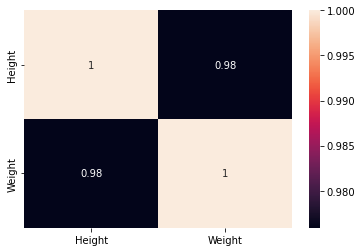

In [7]:
# Checking the Correlation
sns.heatmap(df.corr(), annot = True);

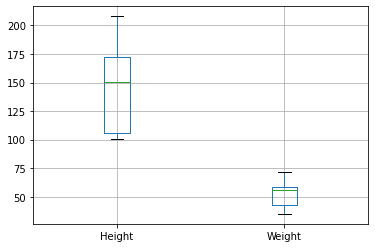

In [8]:
# Outliers
df.boxplot();

In [9]:
# Nulls
df.isnull().sum()

Height    0
Weight    0
dtype: int64

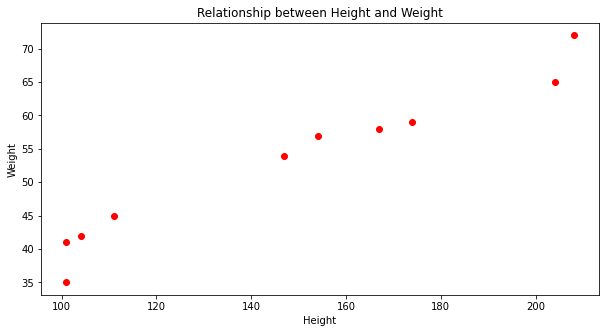

In [11]:
plt.figure(figsize = (10, 5))
plt.title("Relationship between Height and Weight")
plt.scatter(df['Height'], df['Weight'], color = 'r')
plt.xlabel('Height')
plt.ylabel('Weight');

In [15]:
# Choose Indenpendent and Target Variables
x = df[['Height']]
y = df['Weight']
x.head(2)

,Height
0,101
1,101


In [16]:
y.head(2)

0    35
1    41
Name: Weight, dtype: int64

# Build the Model

In [17]:
model = LinearRegression().fit(x, y) # fit - application

In [19]:
# Intercept
inter = model.intercept_
inter

12.301522070995624

In [20]:
# Slope
slope = model.coef_
slope

array([0.27531256])

In [22]:
print(f"Y = {np.around(slope, 2)} x + {round(inter, 2)}") # Full Equation

Y = [0.28] x + 12.3


In [24]:
# Predicting for a single x value
gow = 181
print(f"{(slope * gow) + inter}")

[62.13309587]


In [26]:
x

,Height
0,101
1,101
2,104
3,111
4,147
5,154
6,167
7,174
8,204
9,208


In [27]:
y_hat = model.predict(x)
y_hat

array([40.10809087, 40.10809087, 40.93402856, 42.8612165 , 52.77246874,
       54.69965668, 58.27871999, 60.20590793, 68.4652848 , 69.56653505])

In [31]:
df['Predicted Weight'] = np.around(y_hat, 2)

In [32]:
df

,Height,Weight,Predicted Weight
0,101,35,40.11
1,101,41,40.11
2,104,42,40.93
3,111,45,42.86
4,147,54,52.77
5,154,57,54.70
6,167,58,58.28
7,174,59,60.21
8,204,65,68.47
9,208,72,69.57


In [37]:
# R2 Score
round(model.score(x, y)*100, 2)

95.24

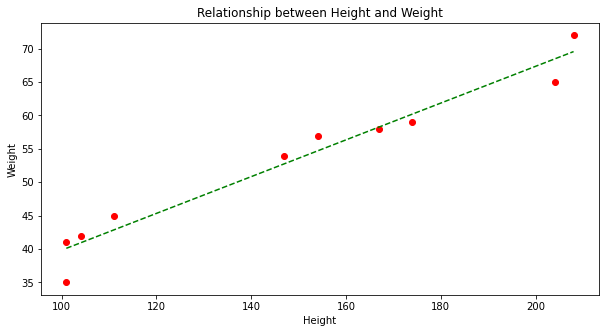

In [39]:
plt.figure(figsize = (10, 5))
plt.title("Relationship between Height and Weight")
plt.scatter(df['Height'], df['Weight'], color = 'r')
plt.plot(df['Height'], df['Predicted Weight'], 'g--')
plt.xlabel('Height')
plt.ylabel('Weight');